# Forecasting Forex Exchange Rates Using Time Series Models

# Importing Libriaries


In [87]:
#!pip install alpha_vantage

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from alpha_vantage.foreignexchange import ForeignExchange 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
api_key = "968U93YONJTBSCFS"   #My Api Key

In [3]:
# Initialize the ForeignExchange class
fx = ForeignExchange(key= "api_key", output_format="pandas")

## Getting USD/UGX Data

In [111]:
# Get the daily exchange rates
data, meta_data = fx.get_currency_exchange_daily(from_symbol="USD", to_symbol="UGX", outputsize="full")

In [142]:
data.head(2)

,Open,High,Low,Close,Year,Month
date,,,,,,
2014-11-07,2705.0,2705.0,2705.0,2705.0,2014,11
2014-11-10,2705.0,2705.0,2700.0,2700.0,2014,11


In [141]:
data = data.sort_index()

In [ ]:
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month

In [113]:
# Renaming columns
data.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Close"
}, inplace=True)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2541 entries, 2024-08-08 to 2014-11-07
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2541 non-null   float64
 1   High    2541 non-null   float64
 2   Low     2541 non-null   float64
 3   Close   2541 non-null   float64
dtypes: float64(4)
memory usage: 99.3 KB


In [115]:
data.describe()

,Open,High,Low,Close
count,2541.000000,2541.000000,2541.000000,2541.000000
mean,3595.060763,3601.469540,3590.314443,3596.613538
std,233.112356,221.440484,233.086180,221.584188
min,31.200000,2705.000000,31.000000,2700.000000
25%,3546.400000,3550.000000,3542.700000,3546.400000
50%,3664.300000,3665.400000,3662.000000,3664.400000
75%,3727.000000,3732.000000,3722.500000,3727.000000
max,3934.800000,3934.800000,3930.400000,3934.800000


In [116]:
print(data.isnull().sum())

Open     0
High     0
Low      0
Close    0
dtype: int64


## Getting USD/KES Data

In [41]:
# # Get the daily exchange rates
# data2, meta_data = fx.get_currency_exchange_daily(from_symbol="USD", to_symbol="KES", outputsize="full")

In [42]:
# data2.head(2)

In [43]:
# data2.info()


In [44]:
# data2.describe()


# EDA

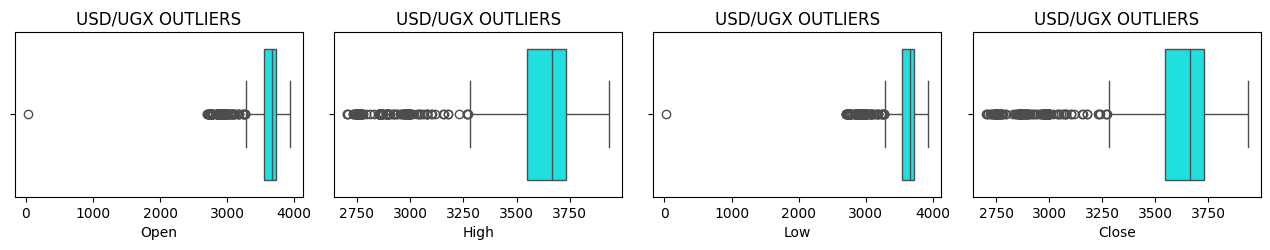

In [45]:
fig=plt.figure(figsize=(16,20))
for var in range(len(data.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=data.iloc[:,var],color="cyan")
    plt.title("USD/UGX OUTLIERS")
plt.tight_layout()
plt.show()

In [46]:
# fig=plt.figure(figsize=(16,20))
# for var in range(len(data2.columns)):
#     fig.add_subplot(9,5,var+1)
#     sns.boxplot(x=data2.iloc[:,var],color="cyan")
#     plt.title("USD/KES OUTLIERS")
# plt.tight_layout()
# plt.show()

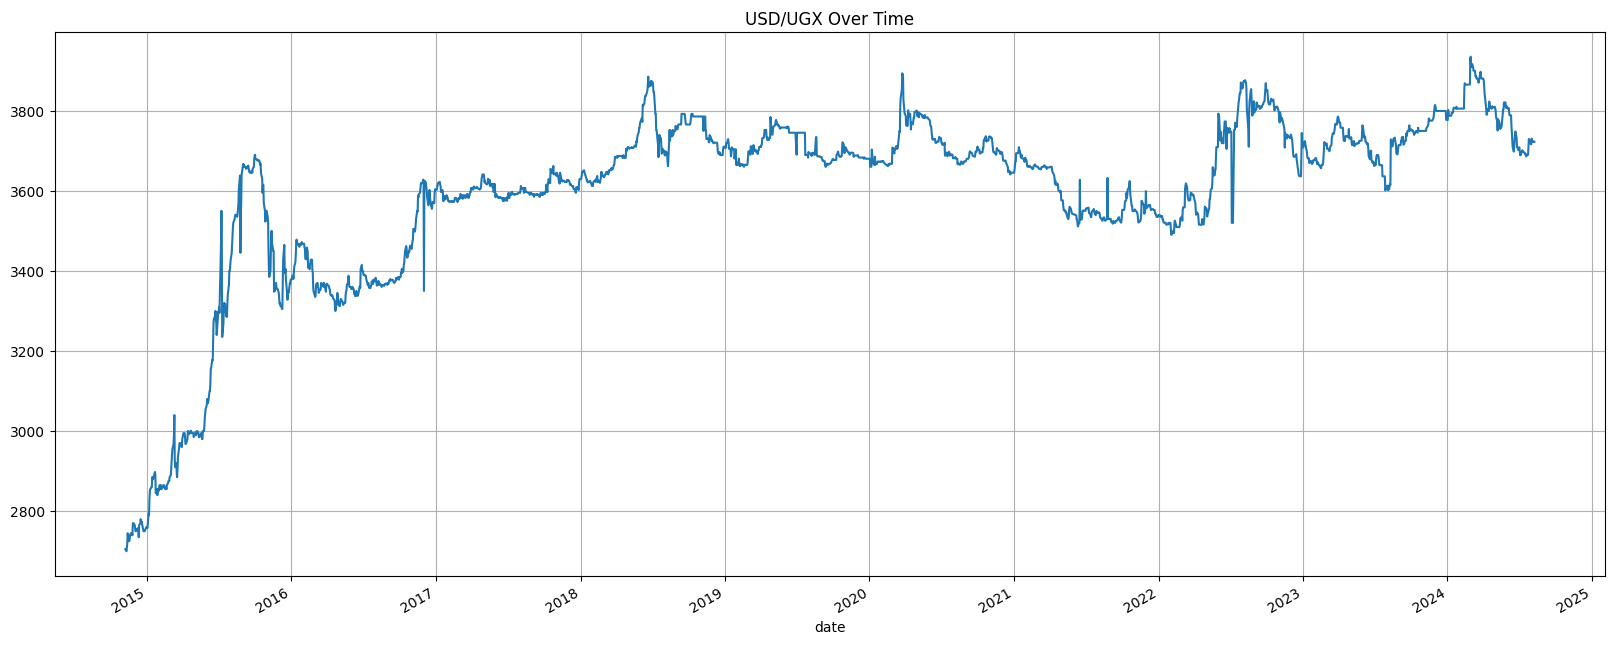

In [66]:
data["Close"].plot(figsize=(20,8))
plt.title("USD/UGX Over Time")
plt.grid()
plt.show()

# data2["4. close"].plot(figsize=(20,8))
# plt.title("USD/KES Over Time")
# plt.show()

# Method 1

In [48]:
# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)
# Sort the index
data = data.sort_index()

In [17]:
# data2.index = pd.to_datetime(data2.index)
# # Sort the index
# data2 = data2.sort_index()

(1865,) (937,)


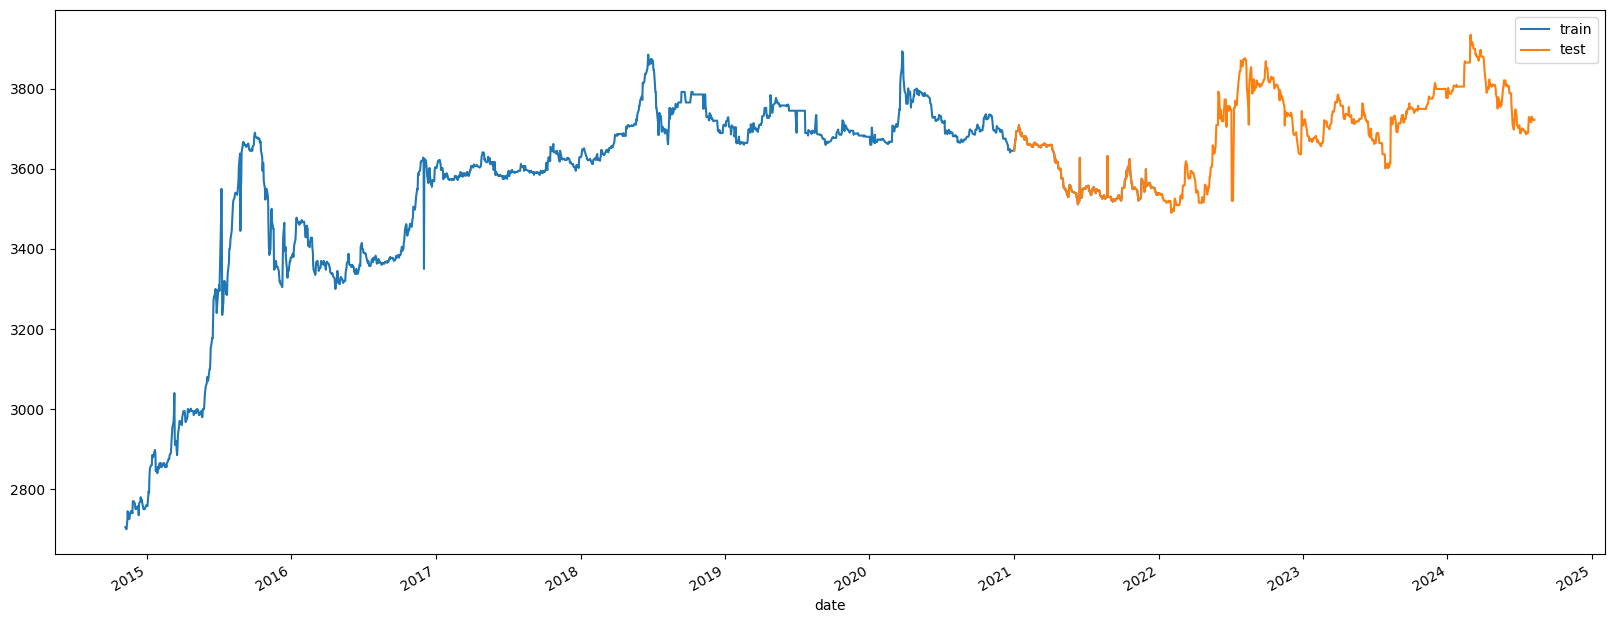

In [50]:

# split the data into train an test
train = data["Close"].loc[:'2021']
test = data["Close"].loc['2021':]

# plot this
fig,ax = plt.subplots(figsize=(20,8))
train.plot(ax=ax)
test.plot(ax=ax)
ax.legend(['train','test'])

print(train.shape,test.shape)

In [51]:

# # split the data into train an test
# train = data2["4. close"].loc[:'2021']
# test = data2["4. close"].loc['2021':]

# # plot this
# fig,ax = plt.subplots(figsize=(20,8))
# train.plot(ax=ax)
# test.plot(ax=ax)
# ax.legend(['train','test'])

# print(train.shape,test.shape)

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
ts_data = data["Close"]

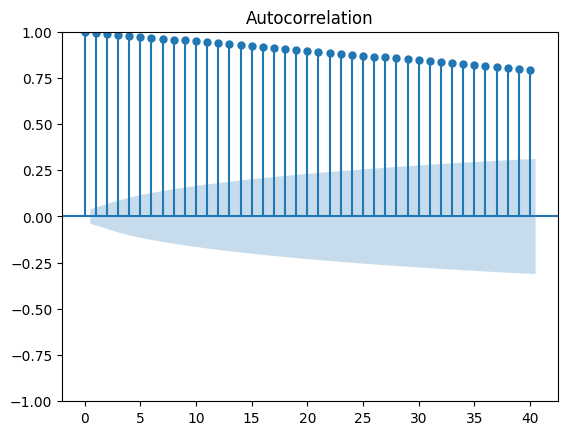

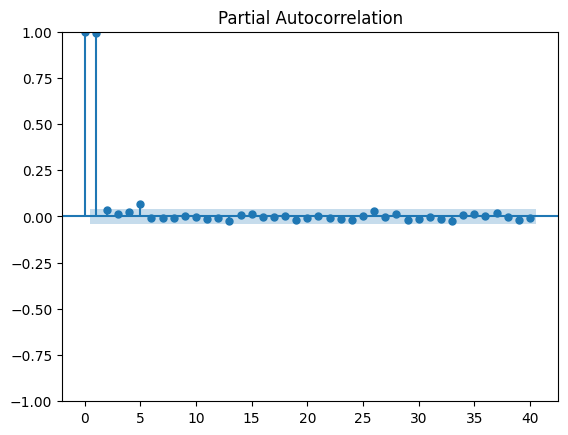

In [53]:
plot_acf(ts_data, lags=40)
plot_pacf(ts_data, lags=40)
plt.show()

In [90]:
# Define the model
model = ARIMA(ts_data, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2541
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10906.473
Date:                Thu, 08 Aug 2024   AIC                          21818.947
Time:                        13:36:57   BIC                          21836.467
Sample:                             0   HQIC                         21825.302
                               - 2541                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6202      0.029     21.633      0.000       0.564       0.676
ma.L1         -0.7142      0.029    -25.046      0.000      -0.770      -0.658
sigma2       314.1497      1.873    167.709      0.0

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


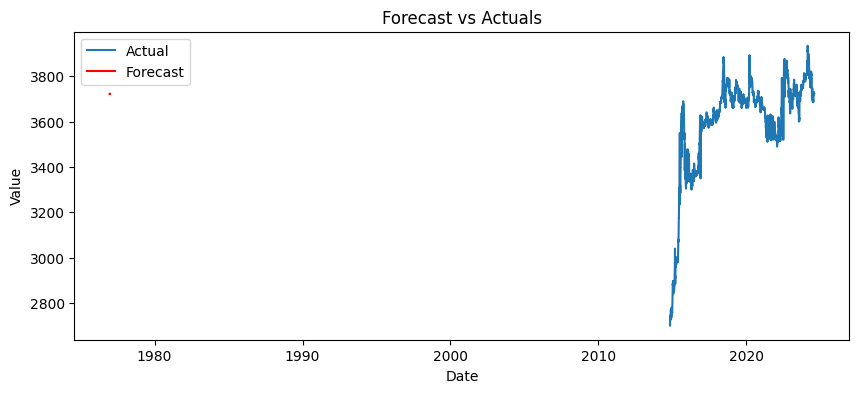

In [91]:
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(ts_data, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# ARIMA

In [143]:

data.head()

,Open,High,Low,Close,Year,Month
date,,,,,,
2014-11-07,2705.0,2705.0,2705.0,2705.0,2014,11
2014-11-10,2705.0,2705.0,2700.0,2700.0,2014,11
2014-11-11,2710.0,2710.0,2710.0,2710.0,2014,11
2014-11-12,2710.0,2730.0,2710.0,2720.0,2014,11
2014-11-13,2720.0,2745.0,2720.0,2745.0,2014,11


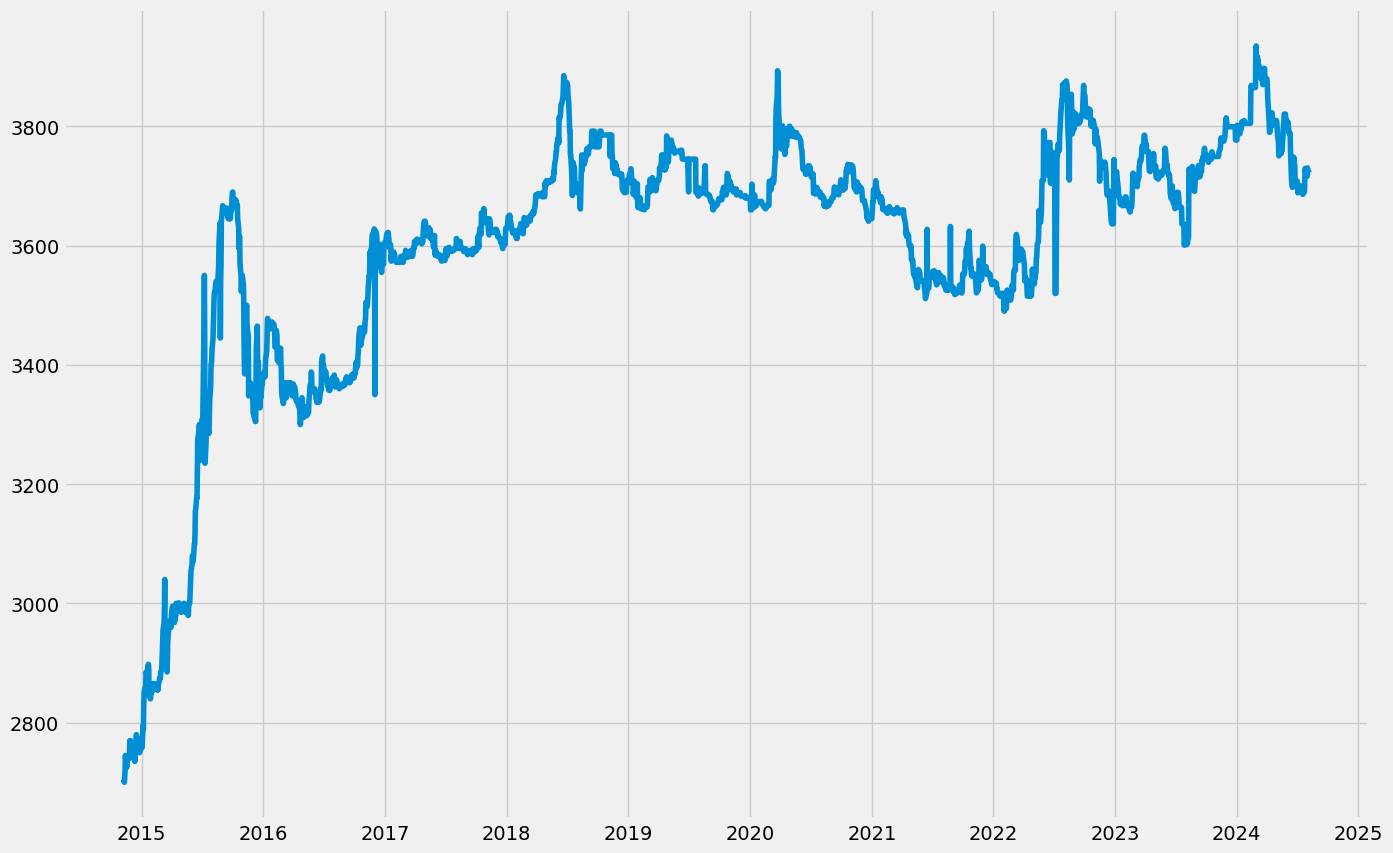

In [144]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data.index, data["Close"])

<Figure size 640x480 with 0 Axes>

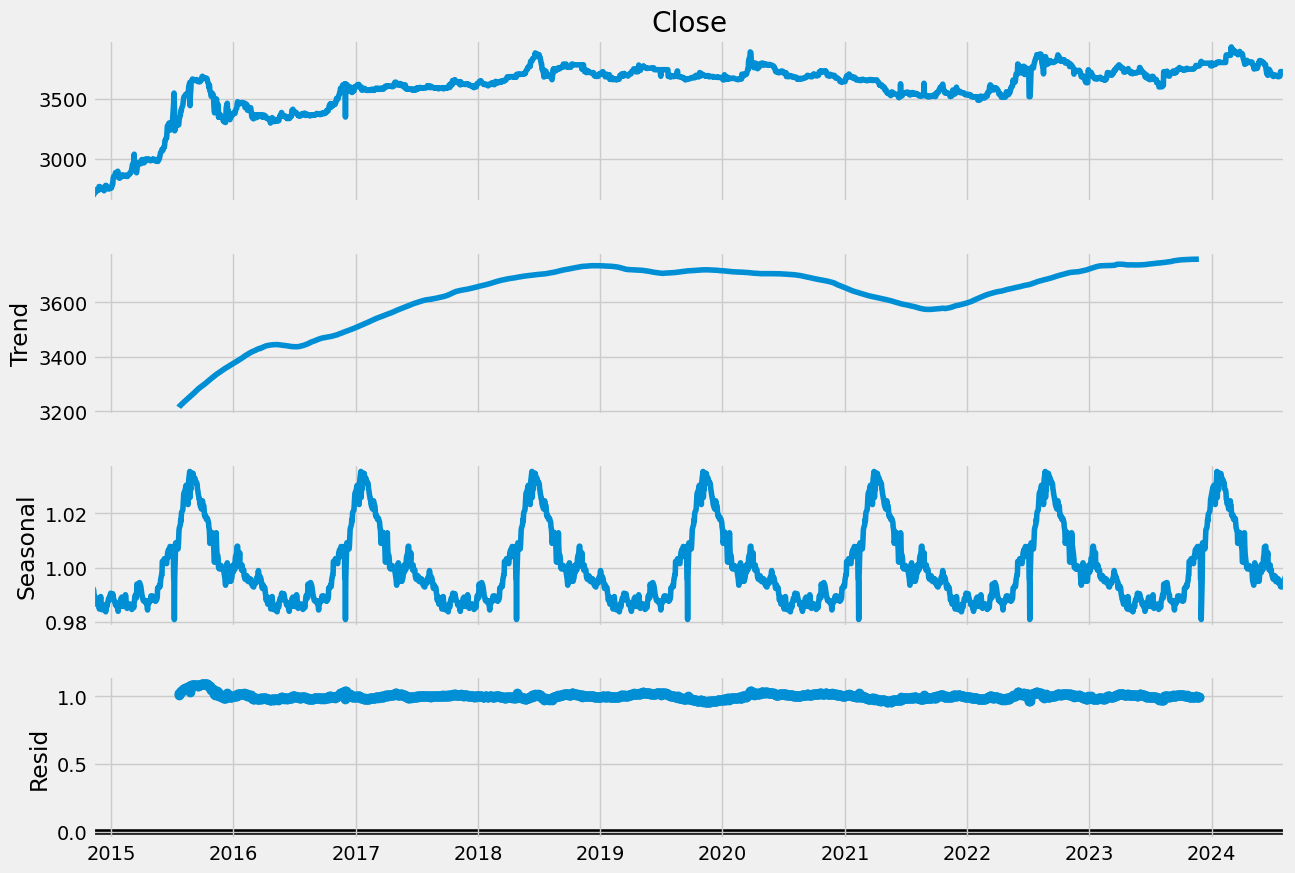

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

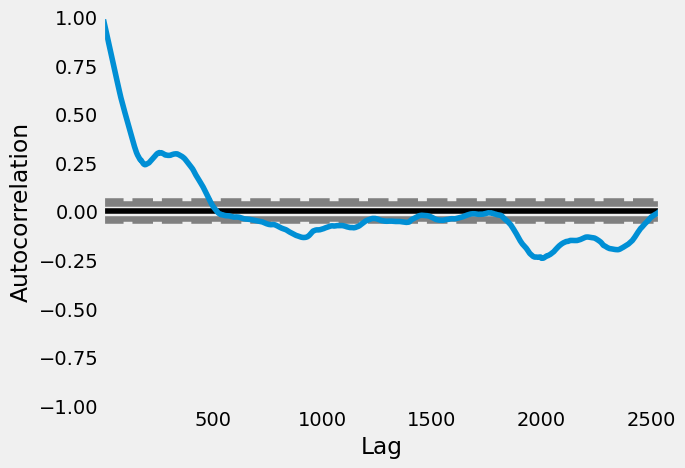

In [146]:
pd.plotting.autocorrelation_plot(data["Close"])

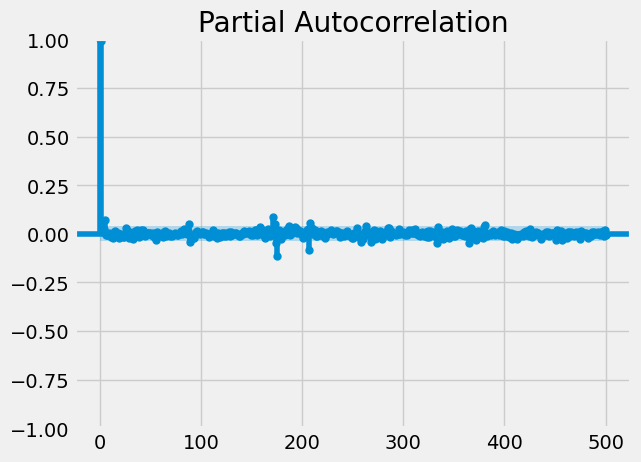

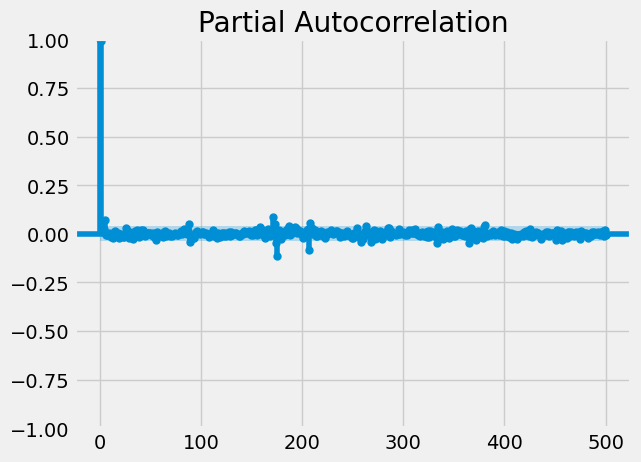

In [147]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 500)

# Method 2

In [148]:
data.head()

,Open,High,Low,Close,Year,Month
date,,,,,,
2014-11-07,2705.0,2705.0,2705.0,2705.0,2014,11
2014-11-10,2705.0,2705.0,2700.0,2700.0,2014,11
2014-11-11,2710.0,2710.0,2710.0,2710.0,2014,11
2014-11-12,2710.0,2730.0,2710.0,2720.0,2014,11
2014-11-13,2720.0,2745.0,2720.0,2745.0,2014,11


To choose the most appropriate time series forecasting model, we need to perform seasonal decomposition, which will help us identify any recurring patterns, long-term trends, and random fluctuations present in the USD – UGX exchange rate data:

C:\Users\Dell\AppData\Local\Temp\ipykernel_17320\2316023099.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 2000x800 with 0 Axes>

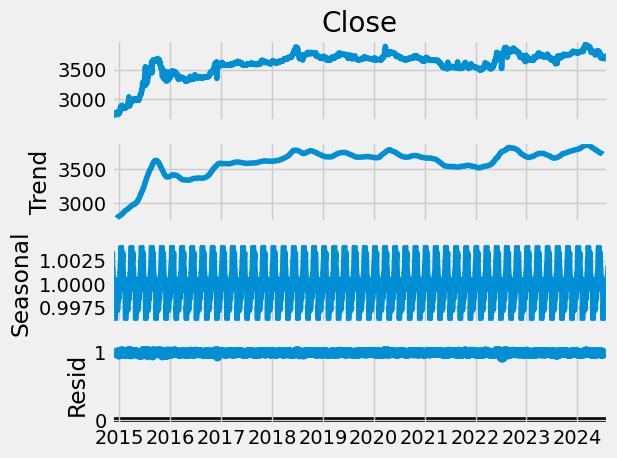

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=52)
plt.figure(figsize=(20,8))  
fig = result.plot()  
# fig.set_size_inches(8, 6)
fig.show()

So we can see that there’s a seasonal pattern in this data. So SARIMA will be the most appropriate algorithm for this data. Before using SARIMA, we need to find p,d, and q values. Here, I will be using the pmdarima library to find these values.

In [133]:
# !pip install pmdarima

In [134]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(1, 1, 1)


In [151]:
p, d, q = 1, 1, 1

In [152]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2541
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood              -10781.340
Date:                            Thu, 08 Aug 2024   AIC                          21572.679
Time:                                    16:24:23   BIC                          21601.776
Sample:                                         0   HQIC                         21583.245
                                           - 2541                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6305      0.032     19.480      0.000       0.567       0.694
ma.L1         -0.7284      0.031   

In [153]:
predictions = fitted.predict(len(data), len(data)+200)
print(predictions)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2541    3725.085382
2542    3728.084705
2543    3731.541077
2544    3732.001577
2545    3732.730437
           ...     
2737    3786.322511
2738    3787.158323
2739    3789.645143
2740    3787.708053
2741    3789.705983
Name: predicted_mean, Length: 201, dtype: float64


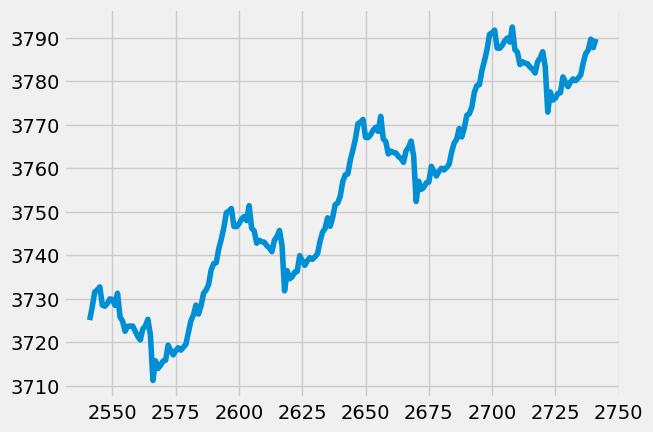

In [157]:
plt.plot(predictions)

ValueError: x and y must have same first dimension, but have shapes (200,) and (201,)

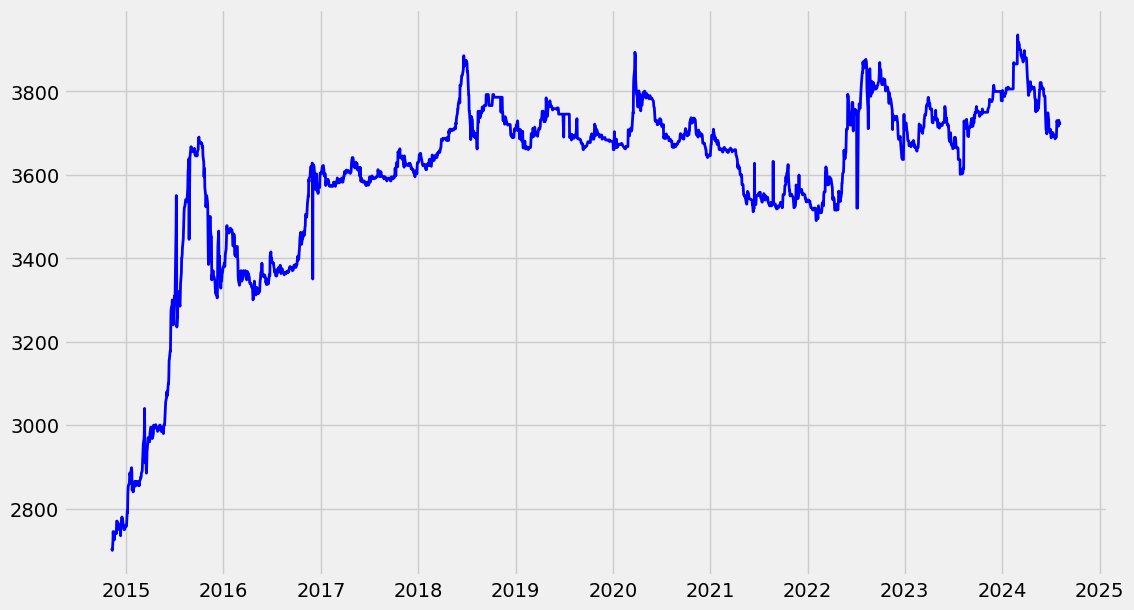

In [155]:
# Step 5: Plot the historical data and predictions
plt.figure(figsize=(12, 7))

# Plot the historical data
plt.plot(data.index, data['Close'], label='Historical Data', color='blue', linewidth=2)

# Generate future dates, including the start of the next period
future_dates = pd.date_range(data.index[-1], periods=200, freq='W')

# Plot the predictions
plt.plot(future_dates, predictions, label='Predictions', color='green', linestyle='--', linewidth=2)

# Customize the plot
plt.title('USD - UGX Rate: Historical Data and SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(title='Data')
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17320\2042495659.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([data, pred_df])


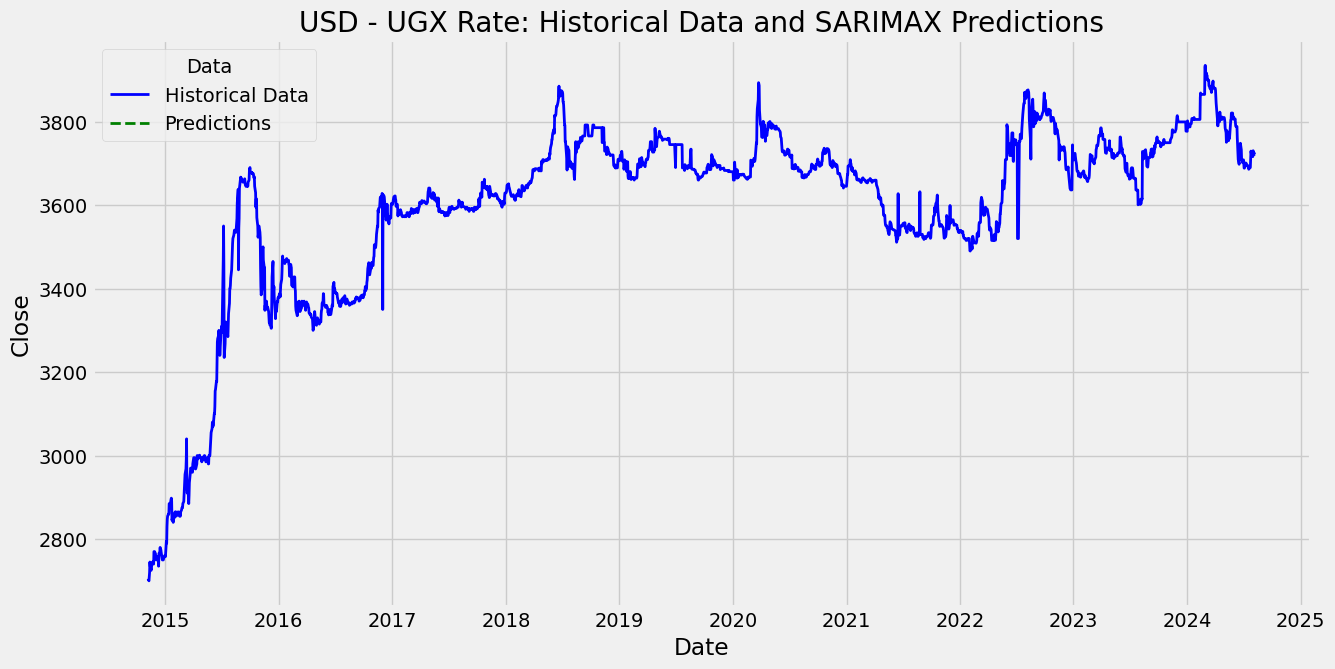

In [156]:
# Step 5: Add predictions to the dataset
# Generate future dates for the prediction period
future_dates = pd.date_range(data.index[-1] + pd.DateOffset(weeks=1), periods=201, freq='W')

# Create a DataFrame for predictions
pred_df = pd.DataFrame(predictions, index=future_dates, columns=['Close'])

# Combine the original data with the predictions
combined_data = pd.concat([data, pred_df])

# Step 6: Plot the original data and predictions
plt.figure(figsize=(14, 7))

# Plot the original historical data
plt.plot(data.index, data['Close'], label='Historical Data', color='blue', linewidth=2)

# Plot the predictions
plt.plot(pred_df.index, pred_df['Close'], label='Predictions', color='green', linestyle='--', linewidth=2)

# Customize the plot
plt.title('USD - UGX Rate: Historical Data and SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(title='Data')
plt.grid(True)
plt.show()